# Oscillations

This notebook aims at applying numerical solutions to one of the most fundamental physical phenomena: oscillations. In physics, with oscillations, we intuitively mean **periodic** motion, so motion that repeats itself in time. 

For simplicity, I will consider a linear spring-mass system undergoing two types of motion: simple harmonic oscillation and damped oscillation. Since this is not a physics course, I will assume that all the _physical_ reasoning is clear and I will focus only on the numerical analysis of the ODEs.

Before using approximation methods for the solutions, I will first have a small digression on the model, so that you can follow _my_ reasoning.

## Simple Harmonic Oscillation

The typical differential equation that describes a SHO is

$$
mx'' = -kx
$$

with initial conditions $x(0) = x_0$ and $x'(0) = v_0$, where:
* $x$ is a function of time $t$, so $x = x(t)$, and represent the displacement from the equilibrium position
* $x'$ is the velocity
* $x''$ is the acceleration towards the equilibrium position
* $m$ is the mass of the body
* $k$ is the elastic constant of the spring 

To find the solution $x(t)$ we simply write the characteristic equation $m\lambda^2=-k$ and solve for $\lambda$. In this case we trivially get $\lambda^2 = -\frac{k}{m}$. Since both $k$ and $m$ are positive, we have that $-\frac{k}{m} < 0$ so that $\lambda = \pm i \sqrt{\frac{k}{m}}$. Letting $\omega = \sqrt{\frac{k}{m}}$ we get the general solution $x(t) = c_1\cos(\omega t) + c_2\sin(\omega t)$. Plugging in the initial conditions we get the particular solution

$$
x(t) = x_0 \cos(\omega t) + \frac{v_0}{\omega}\sin(\omega t)
$$

To analyze the system in its phase plane we get the following system of equations
$$
\begin{cases}
x_1' = x_2\\
x_2' = -\frac{k}{m}x_1
\end{cases}
$$

where in this case the displacement is represented by $x_1$ while the velocity by $x_2 = x_1'$. To study the trajectory in the $(x,v)$ plane we notice that the representative matrix is
$$
A = 
\begin{bmatrix}
0 && 1 \\
-\frac{k}{m} && 0
\end{bmatrix}
$$
where $tr(A) = 0$ and $det(A) = \frac{k}{m}$. Since $\Delta = tr(A) - 4det(A) < 0 $ we get that the trajectories are neutrally stable centres around the origin. 
Moreover from the fact that $v(t) = x'(t)$ we easily recover that $v(t) = v_0\cos(\omega t) -x_0\omega\sin(\omega t)$. Let's visualize it with the following values: $k = m = x_0 = 1$ and $v_0 = 0$

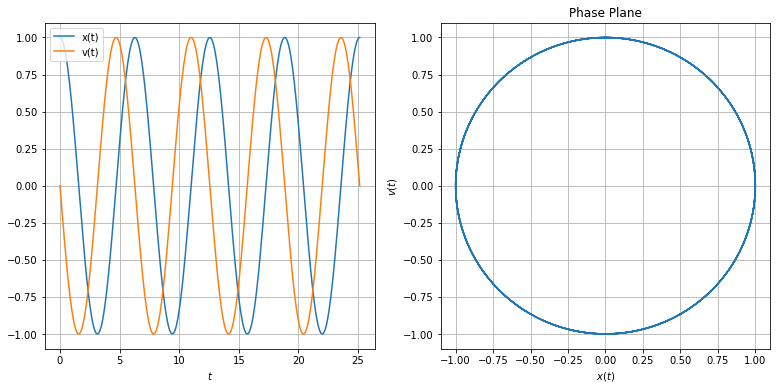

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot(t, x, v):
    """
    TBA
    """
    
    fig, ax = plt.subplots(1, 2, figsize = (13, 6))
    
    # x(t) and v(t)
    ax[0].plot(t, x, label = "x(t)")
    ax[0].plot(t, v, label = "v(t)")
    ax[0].set(xlabel = "$t$")
    ax[0].legend()
    ax[0].grid()
    # phase plane
    ax[1].plot(x, v)
    ax[1].set(xlabel = "$x(t)$", ylabel = "$v(t)$", title = "Phase Plane")
    ax[1].grid()

    plt.show()

m = 1
k = 1
x0 = 1
v0 = 0
omega = np.sqrt(k / m)
time = np.linspace(0, 8 * np.pi, 350)
x = x0 * np.cos(omega * time) + (v0 / omega) * np.sin(omega * time)
v = v0 * np.cos(omega * time) - (x0 * omega) * np.sin(omega * time)

plot(time, x, v)

Now we want to simulate the system using Euler's method and we will indeed use the representatvie matrix.

Recall that Euler's approximation is given by $x_{n+1} = x_n + hf(t,x)$ where $t \in \{ nh : n = 0, 1, \dots\}$ for a fixed step size $h > 0$ and the original problem is of the type $x' = f(t,x)$.

In our case the system is autonomous, so time independent. This means that for $\bar{x} \in \mathbb{R} ^ 2$ we have $\bar{x}' = f(t, \bar{x}) = f(\bar{x}) = A \bar{x}$.
So we get $\bar{x}_{n+1} = \bar{x}_n + hA\bar{x}_n$, from which we recover a new general formula for high-dimensional cases

$$
\bar{x}_{n+1} = (I + hA)\bar{x}_n
$$

where $I$ is the identity matrix. 

TO BE CONTINUED